## In this notebook, I both engineer features and explore the data. 

Specifcally, I convert feature arrays from strings to floats, compute the mean, standard deviation and percentiles from these arrays.

I then compare the distributions between classes for each feature (using pairplots) to get an idea for feature importance. 

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
with open('all_labeled_data.pickle', 'rb') as read_file:
    df = pickle.load(read_file)
    
df.head()

,centroid,chroma,chroma_cens,chroma_cqt,contrast,file_number,flatness,index,mean_centroid,mean_chroma,...,mean_zero_cr,mel,mfccs,rmse,rolloff,spec_bw,spec_contrast,tonnetz,zero_cr,label
0,[[504.48257148 486.40693278 470.00318888 458.3...,[0.54581436 0.60204302 0.75422708 0.83723864 0...,[[0.23143955 0.23162181 0.23182812 ... 0.27899...,[[0.55334989 0.73690282 0.70845463 ... 0.70770...,[19.62451933 11.26503332 12.72140427 56.165287...,1,[[1.32692594e-06 3.85900563e-07 8.42322656e-09...,train1.wav,443.787989,0.685376,...,0.042138,[4.66567711e-02 1.67171275e-01 3.63310730e-01 ...,[-6.44730806e+02 2.56817895e+02 1.58503050e+...,[[0.26807293 0.2719934 0.30389765 0.31095374 ...,[[753.66210938 753.66210938 742.89550781 721.3...,[[330.53144218 281.77145121 245.76683196 239.8...,[[22.44497389 10.83755733 14.62975989 20.37279...,[ 0.00198343 -0.00508595 0.0660235 0.047146...,[[0.02392578 0.03466797 0.04541016 0.046875 ...,0
1,[[577.97243044 524.01977987 427.78777341 420.3...,[0.6937604 0.6619282 0.67327483 0.83409719 0...,[[0.21704897 0.21644774 0.21590343 ... 0.29807...,[[0.91323336 0.72939455 0.66281015 ... 1. ...,[16.21541347 10.36397665 13.25033723 54.129334...,2,[[6.5010463e-05 2.9992112e-05 4.2579142e-08 5....,train2.wav,463.286988,0.706040,...,0.042093,[1.24066644e-04 7.28846028e-04 2.67229303e-03 ...,[-7.36124813e+02 2.44485183e+02 1.49323090e+...,[[0.17244595 0.13339429 0.11844186 0.10560928 ...,[[753.66210938 732.12890625 667.52929688 645.9...,[[663.20235137 548.26586027 208.22355781 203.6...,[[11.80591084 16.68927063 13.92415427 16.83627...,[ 0.00818045 -0.00117309 0.02137063 0.005662...,[[0.02197266 0.03417969 0.04345703 0.04101562 ...,0
2,[[559.55729635 528.68537997 493.25946834 479.8...,[0.67377754 0.67545543 0.76603449 0.75670351 0...,[[0.36211961 0.3571492 0.35205534 ... 0.28488...,[[0.57887618 0.8278652 0.80876065 ... 0.44839...,[19.49029831 10.76560549 12.28624703 54.706529...,3,[[5.3348005e-05 1.6811937e-05 3.5331706e-08 2....,train3.wav,468.395865,0.727035,...,0.042868,[1.69410231e-04 8.37843759e-04 1.69996183e-03 ...,[-7.18175685e+02 2.49495845e+02 1.51575915e+...,[[0.14040385 0.1359778 0.13274789 0.14748028 ...,[[732.12890625 732.12890625 742.89550781 710.5...,[[663.76955723 480.21842727 204.16179659 191.7...,[[12.65364156 8.33372768 14.72258296 13.54955...,[ 0.005731 -0.0008887 0.01147021 0.010365...,[[0.02392578 0.03613281 0.04541016 0.04638672 ...,0
3,[[476.40339026 466.14735071 486.65554654 493.1...,[0.71536 0.68535892 0.68436785 0.73879001 0...,[[0.38081637 0.37959923 0.3784084 ... 0.28371...,[[0.71287569 0.91182481 0.81314382 ... 0.84112...,[21.99398376 11.21640425 13.21343611 56.224961...,4,[[3.93400853e-07 1.46186906e-07 3.61700003e-08...,train4.wav,456.602276,0.713940,...,0.040134,[9.53286843e-05 3.84619199e-04 1.28008202e-03 ...,[-7.10932459e+02 2.44696894e+02 1.51166062e+...,[[0.13967143 0.13067499 0.13031767 0.16876325 ...,[[742.89550781 721.36230469 732.12890625 678.2...,[[269.38864711 239.29599281 209.14325354 192.6...,[[25.21498022 11.79400243 19.01732861 24.72397...,[ 0.00315338 0.00467927 0.02231854 0.013073...,[[0.02294922 0.03515625 0.04736328 0.04589844 ...,0
4,[[549.73110503 506.98113396 473.99013424 473.9...,[0.62032704 0.61695566 0.67535189 0.69344183 0...,[[0.29312185 0.29195579 0.2914121 ... 0.29096...,[[0.43504997 0.84417333 0.96267805 ... 0.20194...,[21.30596447 10.20325473 12.75112812 55.260719...,5,[[3.01305136e-05 8.84687415e-06 1.99340775e-08...,train5.wav,471.288952,0.695250,...,0.043244,[8.71598585e-05 2.49764398e-04 9.07598442e-04 ...,[-6.60409241e+02 2.30303621e+02 1.40471045e+...,[[0.19937678 0.19993429 0.18210486 0.20334208 ...,[[699.82910156 721.36230469 732.12890625 721.3...,[[575.75803571 421.59927487 214.78639831 194.3...,[[13.6326702 12.90958534 22.18394664 20.01080...,[ 0.00511436 0.01517265 -0.00726036 0.016294...,[[0.02099609 0.03076172 0.04150391 0.04052734 ...,0


In [8]:
df.to_csv('all_labeled_data.csv')

# Feature Engineering

#### Convert string, list of strings into list of floats

In [70]:
root_features = ['centroid', 'chroma', 'chroma_cens', 'chroma_cqt', 'contrast','flatness', 'mel', 'mfccs','rmse', 'rolloff', 'spec_bw', 'spec_contrast', 'tonnetz', 'zero_cr']

In [73]:
for feature in root_features[4:]:
    print(feature)
    df[feature] = df[feature].apply(lambda x: list(map(float,x.replace('[','').replace(']','').replace('\n','').split())))

contrast
flatness
mel
mfccs
rmse
rolloff
spec_bw
spec_contrast
tonnetz
zero_cr


#### Chroma cens and Chroma CQT have extra characters to strip (replace)

In [84]:
for feature in root_features[2:4]:
    print(feature)
    df[feature] = df[feature].apply(lambda x: list(map(float,x.replace('[','').replace(']','').replace('\n','').replace('...','').split())))

chroma_cens
chroma_cqt


In [65]:
df['centroid_f'] = df['centroid'].apply(lambda x: list(map(float,x.replace('[','').replace(']','').replace('\n','').split())))
df['centroid_f'].head()

0    [504.48257148, 486.40693278, 470.00318888, 458...
1    [577.97243044, 524.01977987, 427.78777341, 420...
2    [559.55729635, 528.68537997, 493.25946834, 479...
3    [476.40339026, 466.14735071, 486.65554654, 493...
4    [549.73110503, 506.98113396, 473.99013424, 473...
Name: centroid_f, dtype: object

In [91]:
df['stdev_centroid'] = df['centroid'].apply(lambda x: np.std(x))
df['pctl_25_centroid']  = df['centroid'].apply(lambda x: np.percentile(x,25))
df['pctl_50_centroid']  = df['centroid'].apply(lambda x: np.percentile(x,50))
df['pctl_75_centroid']  = df['centroid'].apply(lambda x: np.percentile(x,75))
df.head()

,centroid,chroma,chroma_cens,chroma_cqt,contrast,file_number,flatness,index,mean_centroid,mean_chroma,...,rolloff,spec_bw,spec_contrast,tonnetz,zero_cr,label,stdev_centroid,pctl_25_centroid,pctl_50_centroid,pctl_75_centroid
0,"[504.48257148, 486.40693278, 470.00318888, 458...","[0.54581436, 0.60204302, 0.75422708, 0.8372386...","[0.23143955, 0.23162181, 0.23182812, 0.2789998...","[0.55334989, 0.73690282, 0.70845463, 0.7077047...","[19.62451933, 11.26503332, 12.72140427, 56.165...",1,"[1.32692594e-06, 3.85900563e-07, 8.42322656e-0...",train1.wav,443.787989,0.685376,...,"[753.66210938, 753.66210938, 742.89550781, 721...","[330.53144218, 281.77145121, 245.76683196, 239...","[22.44497389, 10.83755733, 14.62975989, 20.372...","[0.00198343, -0.00508595, 0.0660235, 0.0471465...","[0.02392578, 0.03466797, 0.04541016, 0.046875,...",0,30.684263,427.842008,443.543329,461.162065
1,"[577.97243044, 524.01977987, 427.78777341, 420...","[0.6937604, 0.6619282, 0.67327483, 0.83409719,...","[0.21704897, 0.21644774, 0.21590343, 0.2980798...","[0.91323336, 0.72939455, 0.66281015, 1.0, 0.99...","[16.21541347, 10.36397665, 13.25033723, 54.129...",2,"[6.5010463e-05, 2.9992112e-05, 4.2579142e-08, ...",train2.wav,463.286988,0.706040,...,"[753.66210938, 732.12890625, 667.52929688, 645...","[663.20235137, 548.26586027, 208.22355781, 203...","[11.80591084, 16.68927063, 13.92415427, 16.836...","[0.00818045, -0.00117309, 0.02137063, 0.005662...","[0.02197266, 0.03417969, 0.04345703, 0.0410156...",0,27.090414,445.416298,457.311174,480.879940
2,"[559.55729635, 528.68537997, 493.25946834, 479...","[0.67377754, 0.67545543, 0.76603449, 0.7567035...","[0.36211961, 0.3571492, 0.35205534, 0.28488815...","[0.57887618, 0.8278652, 0.80876065, 0.44839986...","[19.49029831, 10.76560549, 12.28624703, 54.706...",3,"[5.3348005e-05, 1.6811937e-05, 3.5331706e-08, ...",train3.wav,468.395865,0.727035,...,"[732.12890625, 732.12890625, 742.89550781, 710...","[663.76955723, 480.21842727, 204.16179659, 191...","[12.65364156, 8.33372768, 14.72258296, 13.5495...","[0.005731, -0.0008887, 0.01147021, 0.01036582,...","[0.02392578, 0.03613281, 0.04541016, 0.0463867...",0,21.891469,456.554706,468.627806,479.707968
3,"[476.40339026, 466.14735071, 486.65554654, 493...","[0.71536, 0.68535892, 0.68436785, 0.73879001, ...","[0.38081637, 0.37959923, 0.3784084, 0.28371449...","[0.71287569, 0.91182481, 0.81314382, 0.8411274...","[21.99398376, 11.21640425, 13.21343611, 56.224...",4,"[3.93400853e-07, 1.46186906e-07, 3.61700003e-0...",train4.wav,456.602276,0.713940,...,"[742.89550781, 721.36230469, 732.12890625, 678...","[269.38864711, 239.29599281, 209.14325354, 192...","[25.21498022, 11.79400243, 19.01732861, 24.723...","[0.00315338, 0.00467927, 0.02231854, 0.0130739...","[0.02294922, 0.03515625, 0.04736328, 0.0458984...",0,27.295668,438.723766,459.356317,477.053686
4,"[549.73110503, 506.98113396, 473.99013424, 473...","[0.62032704, 0.61695566, 0.67535189, 0.6934418...","[0.29312185, 0.29195579, 0.2914121, 0.29096149...","[0.43504997, 0.84417333, 0.96267805, 0.2019479...","[21.30596447, 10.20325473, 12.75112812, 55.260...",5,"[3.01305136e-05, 8.84687415e-06, 1.99340775e-0...",train5.wav,471.288952,0.695250,...,"[699.82910156, 721.36230469, 732.12890625, 721...","[575.75803571, 421.59927487, 214.78639831, 194...","[13.6326702, 12.90958534, 22.18394664, 20.0108...","[0.00511436, 0.01517265, -0.00726036, 0.016294...","[0.02099609, 0.03076172, 0.04150391, 0.0405273...",0,23.372061,456.464726,473.931835,486.529155


In [93]:
for feature in root_features[1:]:
    df[('stdev_'+ feature)] = df[feature].apply(lambda x: np.std(x))
    df[('pctl_25_'+ feature)]  = df[feature].apply(lambda x: np.percentile(x,25))
    df[('pctl_50_'+ feature)]  = df[feature].apply(lambda x: np.percentile(x,50))
    df[('pctl_75_'+ feature)]  = df[feature].apply(lambda x: np.percentile(x,75))
df.head()

,centroid,chroma,chroma_cens,chroma_cqt,contrast,file_number,flatness,index,mean_centroid,mean_chroma,...,pctl_50_spec_contrast,pctl_75_spec_contrast,stdev_tonnetz,pctl_25_tonnetz,pctl_50_tonnetz,pctl_75_tonnetz,stdev_zero_cr,pctl_25_zero_cr,pctl_50_zero_cr,pctl_75_zero_cr
0,"[504.48257148, 486.40693278, 470.00318888, 458...","[0.54581436, 0.60204302, 0.75422708, 0.8372386...","[0.23143955, 0.23162181, 0.23182812, 0.2789998...","[0.55334989, 0.73690282, 0.70845463, 0.7077047...","[19.62451933, 11.26503332, 12.72140427, 56.165...",1,"[1.32692594e-06, 3.85900563e-07, 8.42322656e-0...",train1.wav,443.787989,0.685376,...,16.262727,20.029834,0.024888,0.005155,0.019143,0.041264,0.004743,0.039795,0.042480,0.045410
1,"[577.97243044, 524.01977987, 427.78777341, 420...","[0.6937604, 0.6619282, 0.67327483, 0.83409719,...","[0.21704897, 0.21644774, 0.21590343, 0.2980798...","[0.91323336, 0.72939455, 0.66281015, 1.0, 0.99...","[16.21541347, 10.36397665, 13.25033723, 54.129...",2,"[6.5010463e-05, 2.9992112e-05, 4.2579142e-08, ...",train2.wav,463.286988,0.706040,...,15.050572,19.159550,0.008353,-0.000481,0.003629,0.007551,0.004022,0.040771,0.041992,0.043945
2,"[559.55729635, 528.68537997, 493.25946834, 479...","[0.67377754, 0.67545543, 0.76603449, 0.7567035...","[0.36211961, 0.3571492, 0.35205534, 0.28488815...","[0.57887618, 0.8278652, 0.80876065, 0.44839986...","[19.49029831, 10.76560549, 12.28624703, 54.706...",3,"[5.3348005e-05, 1.6811937e-05, 3.5331706e-08, ...",train3.wav,468.395865,0.727035,...,15.721419,19.831365,0.009168,-0.003178,0.002421,0.009207,0.004212,0.041992,0.043457,0.045410
3,"[476.40339026, 466.14735071, 486.65554654, 493...","[0.71536, 0.68535892, 0.68436785, 0.73879001, ...","[0.38081637, 0.37959923, 0.3784084, 0.28371449...","[0.71287569, 0.91182481, 0.81314382, 0.8411274...","[21.99398376, 11.21640425, 13.21343611, 56.224...",4,"[3.93400853e-07, 1.46186906e-07, 3.61700003e-0...",train4.wav,456.602276,0.713940,...,15.965496,20.192855,0.008188,0.003535,0.005865,0.011568,0.005485,0.035645,0.041016,0.044678
4,"[549.73110503, 506.98113396, 473.99013424, 473...","[0.62032704, 0.61695566, 0.67535189, 0.6934418...","[0.29312185, 0.29195579, 0.2914121, 0.29096149...","[0.43504997, 0.84417333, 0.96267805, 0.2019479...","[21.30596447, 10.20325473, 12.75112812, 55.260...",5,"[3.01305136e-05, 8.84687415e-06, 1.99340775e-0...",train5.wav,471.288952,0.695250,...,15.684625,19.965120,0.008685,-0.001283,0.002361,0.012658,0.006112,0.040771,0.043945,0.047363


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 87 columns):
centroid                 30000 non-null object
chroma                   30000 non-null object
chroma_cens              30000 non-null object
chroma_cqt               30000 non-null object
contrast                 30000 non-null object
file_number              30000 non-null int64
flatness                 30000 non-null object
index                    30000 non-null object
mean_centroid            30000 non-null float64
mean_chroma              30000 non-null float64
mean_chroma_cens         30000 non-null float64
mean_chroma_cqt          30000 non-null float64
mean_contrast            30000 non-null float64
mean_flatness            30000 non-null float64
mean_mel                 30000 non-null float64
mean_mfccs               30000 non-null float64
mean_rmse                30000 non-null float64
mean_rolloff             30000 non-null float64
mean_spec_bw             30000 non-n

In [96]:
#with open('all_engineered_labeled_data.pickle', 'wb') as to_write:
    #pickle.dump(df, to_write) 

In [97]:
#df.to_csv('all_engineered_labeled_data.csv')

### Read pickle

In [3]:
with open('all_engineered_labeled_data.pickle', 'rb') as read_file:
    df = pickle.load(read_file)
    
df.head()

,centroid,chroma,chroma_cens,chroma_cqt,contrast,file_number,flatness,index,mean_centroid,mean_chroma,...,pctl_50_spec_contrast,pctl_75_spec_contrast,stdev_tonnetz,pctl_25_tonnetz,pctl_50_tonnetz,pctl_75_tonnetz,stdev_zero_cr,pctl_25_zero_cr,pctl_50_zero_cr,pctl_75_zero_cr
0,"[504.48257148, 486.40693278, 470.00318888, 458...","[0.54581436, 0.60204302, 0.75422708, 0.8372386...","[0.23143955, 0.23162181, 0.23182812, 0.2789998...","[0.55334989, 0.73690282, 0.70845463, 0.7077047...","[19.62451933, 11.26503332, 12.72140427, 56.165...",1,"[1.32692594e-06, 3.85900563e-07, 8.42322656e-0...",train1.wav,443.787989,0.685376,...,16.262727,20.029834,0.024888,0.005155,0.019143,0.041264,0.004743,0.039795,0.042480,0.045410
1,"[577.97243044, 524.01977987, 427.78777341, 420...","[0.6937604, 0.6619282, 0.67327483, 0.83409719,...","[0.21704897, 0.21644774, 0.21590343, 0.2980798...","[0.91323336, 0.72939455, 0.66281015, 1.0, 0.99...","[16.21541347, 10.36397665, 13.25033723, 54.129...",2,"[6.5010463e-05, 2.9992112e-05, 4.2579142e-08, ...",train2.wav,463.286988,0.706040,...,15.050572,19.159550,0.008353,-0.000481,0.003629,0.007551,0.004022,0.040771,0.041992,0.043945
2,"[559.55729635, 528.68537997, 493.25946834, 479...","[0.67377754, 0.67545543, 0.76603449, 0.7567035...","[0.36211961, 0.3571492, 0.35205534, 0.28488815...","[0.57887618, 0.8278652, 0.80876065, 0.44839986...","[19.49029831, 10.76560549, 12.28624703, 54.706...",3,"[5.3348005e-05, 1.6811937e-05, 3.5331706e-08, ...",train3.wav,468.395865,0.727035,...,15.721419,19.831365,0.009168,-0.003178,0.002421,0.009207,0.004212,0.041992,0.043457,0.045410
3,"[476.40339026, 466.14735071, 486.65554654, 493...","[0.71536, 0.68535892, 0.68436785, 0.73879001, ...","[0.38081637, 0.37959923, 0.3784084, 0.28371449...","[0.71287569, 0.91182481, 0.81314382, 0.8411274...","[21.99398376, 11.21640425, 13.21343611, 56.224...",4,"[3.93400853e-07, 1.46186906e-07, 3.61700003e-0...",train4.wav,456.602276,0.713940,...,15.965496,20.192855,0.008188,0.003535,0.005865,0.011568,0.005485,0.035645,0.041016,0.044678
4,"[549.73110503, 506.98113396, 473.99013424, 473...","[0.62032704, 0.61695566, 0.67535189, 0.6934418...","[0.29312185, 0.29195579, 0.2914121, 0.29096149...","[0.43504997, 0.84417333, 0.96267805, 0.2019479...","[21.30596447, 10.20325473, 12.75112812, 55.260...",5,"[3.01305136e-05, 8.84687415e-06, 1.99340775e-0...",train5.wav,471.288952,0.695250,...,15.684625,19.965120,0.008685,-0.001283,0.002361,0.012658,0.006112,0.040771,0.043945,0.047363


## Distribution of Labels

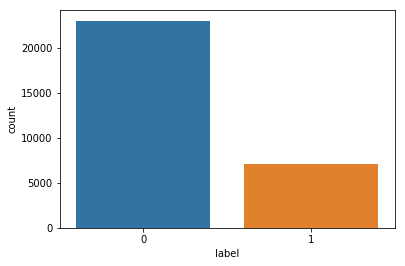

In [3]:
sns.countplot(df['label'])

In [4]:
df['label'].value_counts()

0    22973
1     7027
Name: label, dtype: int64

In [6]:
print('Percent Right Whales: ' + str(7027/22973*100))

Percent Right Whales: 30.588081661080395


## EDA - Features

In [11]:
columns = (['centroid', 'chroma', 'chroma_cens', 'chroma_cqt', 'contrast',
       'flatness', 'mean_centroid', 'mean_chroma',
       'mean_chroma_cens', 'mean_chroma_cqt', 'mean_contrast', 'mean_flatness',
       'mean_mel', 'mean_mfccs', 'mean_rmse', 'mean_rolloff', 'mean_spec_bw',
       'mean_spec_contrast', 'mean_tonnetz', 'mean_zero_cr', 'mel', 'mfccs',
       'rmse', 'rolloff', 'spec_bw', 'spec_contrast', 'tonnetz', 'zero_cr',
       'stdev_centroid', 'pctl_25_centroid', 'pctl_50_centroid',
       'pctl_75_centroid', 'stdev_chroma', 'pctl_25_chroma', 'pctl_50_chroma',
       'pctl_75_chroma', 'stdev_chroma_cens', 'pctl_25_chroma_cens',
       'pctl_50_chroma_cens', 'pctl_75_chroma_cens', 'stdev_chroma_cqt',
       'pctl_25_chroma_cqt', 'pctl_50_chroma_cqt', 'pctl_75_chroma_cqt',
       'stdev_contrast', 'pctl_25_contrast', 'pctl_50_contrast',
       'pctl_75_contrast', 'stdev_flatness', 'pctl_25_flatness',
       'pctl_50_flatness', 'pctl_75_flatness', 'stdev_mel', 'pctl_25_mel',
       'pctl_50_mel', 'pctl_75_mel', 'stdev_mfccs', 'pctl_25_mfccs',
       'pctl_50_mfccs', 'pctl_75_mfccs', 'stdev_rmse', 'pctl_25_rmse',
       'pctl_50_rmse', 'pctl_75_rmse', 'stdev_rolloff', 'pctl_25_rolloff',
       'pctl_50_rolloff', 'pctl_75_rolloff', 'stdev_spec_bw',
       'pctl_25_spec_bw', 'pctl_50_spec_bw', 'pctl_75_spec_bw',
       'stdev_spec_contrast', 'pctl_25_spec_contrast', 'pctl_50_spec_contrast',
       'pctl_75_spec_contrast', 'stdev_tonnetz', 'pctl_25_tonnetz',
       'pctl_50_tonnetz', 'pctl_75_tonnetz', 'stdev_zero_cr',
       'pctl_25_zero_cr', 'pctl_50_zero_cr', 'pctl_75_zero_cr'])
print(len(columns))
subset1 = ['label'] + columns[0:6]

84


In [34]:
centroid = ['label','mean_centroid','stdev_centroid', 'pctl_25_centroid', 'pctl_50_centroid','pctl_75_centroid']
chroma=['label','mean_chroma','stdev_chroma', 'pctl_25_chroma', 'pctl_50_chroma','pctl_75_chroma']
chroma_cens=['label','mean_chroma_cens','stdev_chroma_cens', 'pctl_25_chroma_cens','pctl_50_chroma_cens', 'pctl_75_chroma_cens']
chroma_cqt = ['label','mean_chroma_cqt','stdev_chroma_cqt','pctl_25_chroma_cqt', 'pctl_50_chroma_cqt', 'pctl_75_chroma_cqt']
contrast = ['label','mean_contrast','stdev_contrast', 'pctl_25_contrast', 'pctl_50_contrast','pctl_75_contrast']
flatness=['label','mean_flatness','stdev_flatness', 'pctl_25_flatness','pctl_50_flatness', 'pctl_75_flatness']
mel=['label','mean_mel','stdev_mel', 'pctl_25_mel','pctl_50_mel', 'pctl_75_mel']
mfccs=['label','mean_mfccs','stdev_mfccs', 'pctl_25_mfccs','pctl_50_mfccs', 'pctl_75_mfccs']
rmse=['label','mean_rmse','stdev_rmse', 'pctl_25_rmse','pctl_50_rmse', 'pctl_75_rmse']
rolloff=['label','mean_rolloff','stdev_rolloff', 'pctl_25_rolloff','pctl_50_rolloff', 'pctl_75_rolloff']
spec_bw=['label','mean_spec_bw','stdev_spec_bw','pctl_25_spec_bw', 'pctl_50_spec_bw', 'pctl_75_spec_bw']
spec_contrast=['label','mean_spec_contrast','stdev_spec_contrast', 'pctl_25_spec_contrast', 'pctl_50_spec_contrast','pctl_75_spec_contrast']
tonnetz=['label','mean_tonnetz','stdev_tonnetz', 'pctl_25_tonnetz','pctl_50_tonnetz', 'pctl_75_tonnetz']
zero_cr =['label','mean_zero_cr','stdev_zero_cr','pctl_25_zero_cr', 'pctl_50_zero_cr', 'pctl_75_zero_cr']  

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


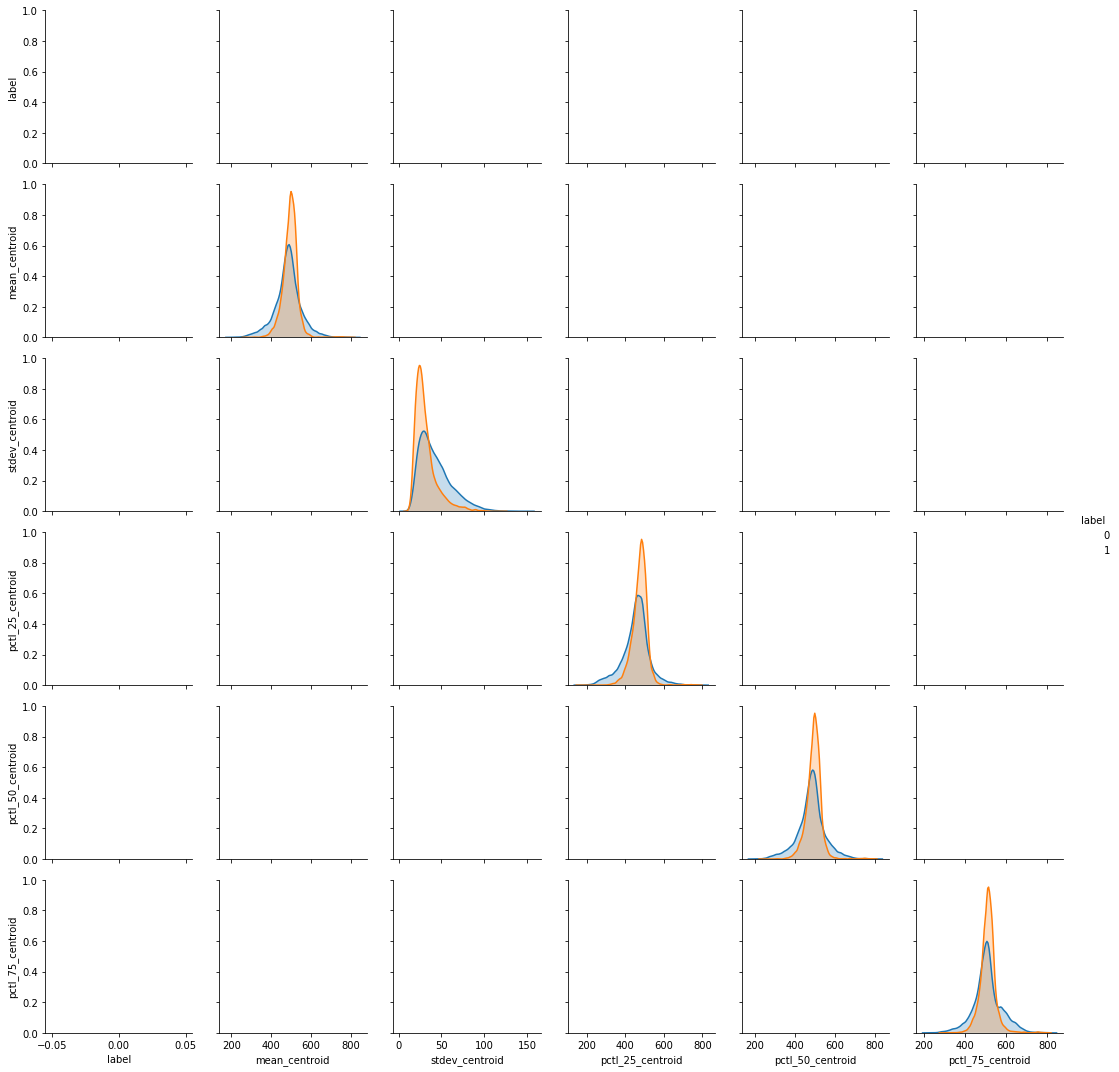

In [33]:
sns.pairplot(data=df[centroid],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


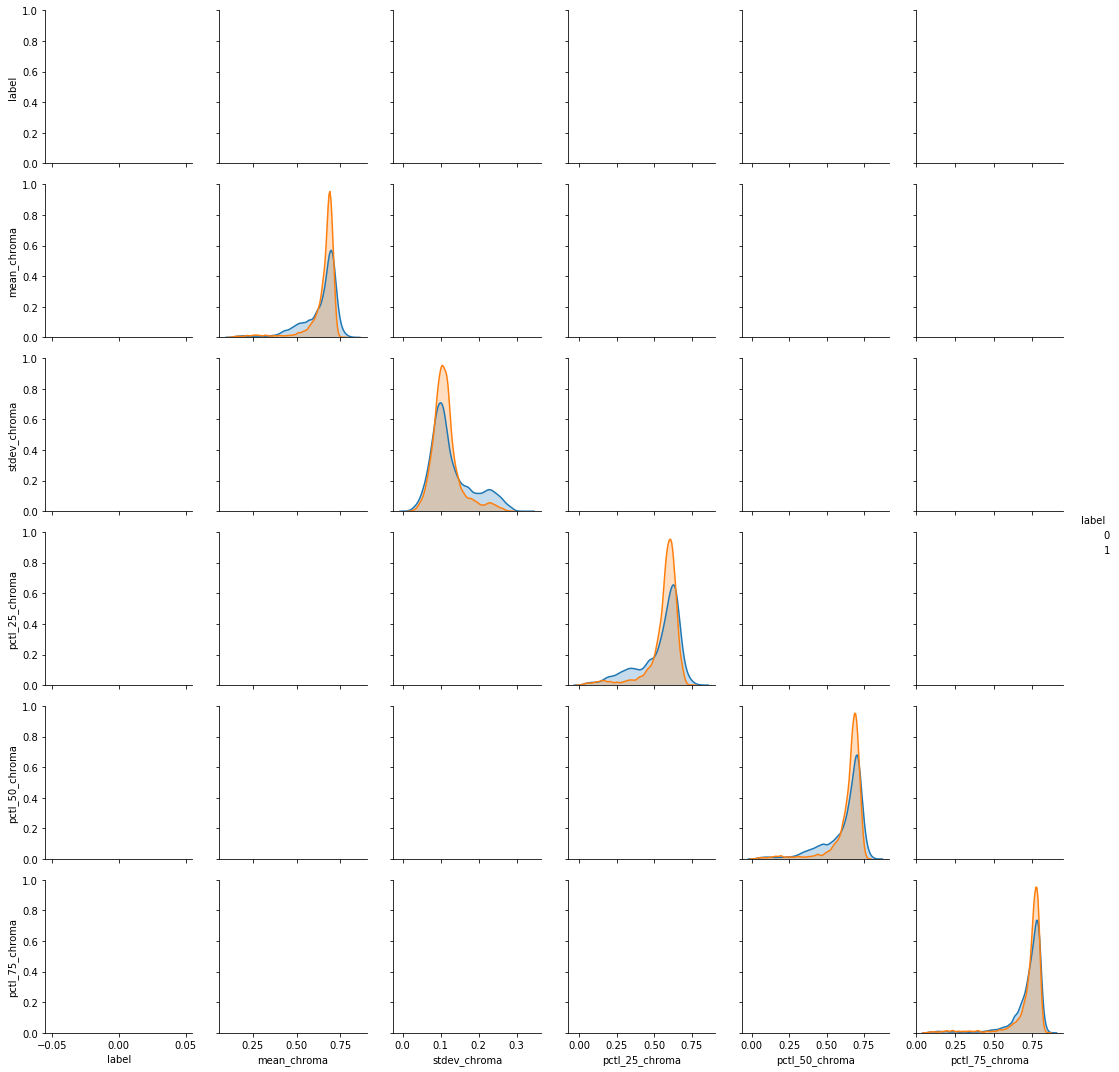

In [35]:
sns.pairplot(data=df[chroma],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


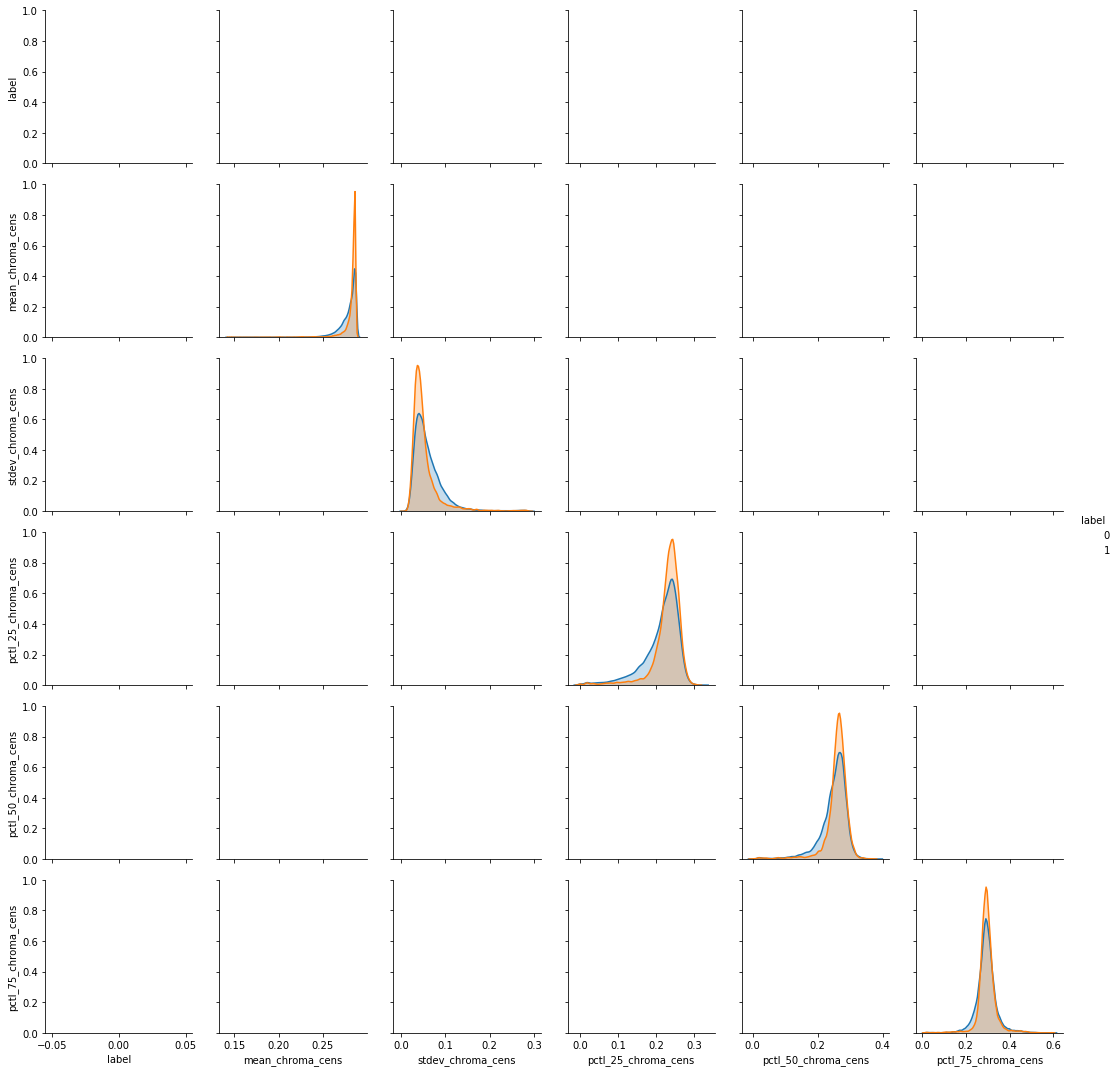

In [36]:
sns.pairplot(data=df[chroma_cens],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


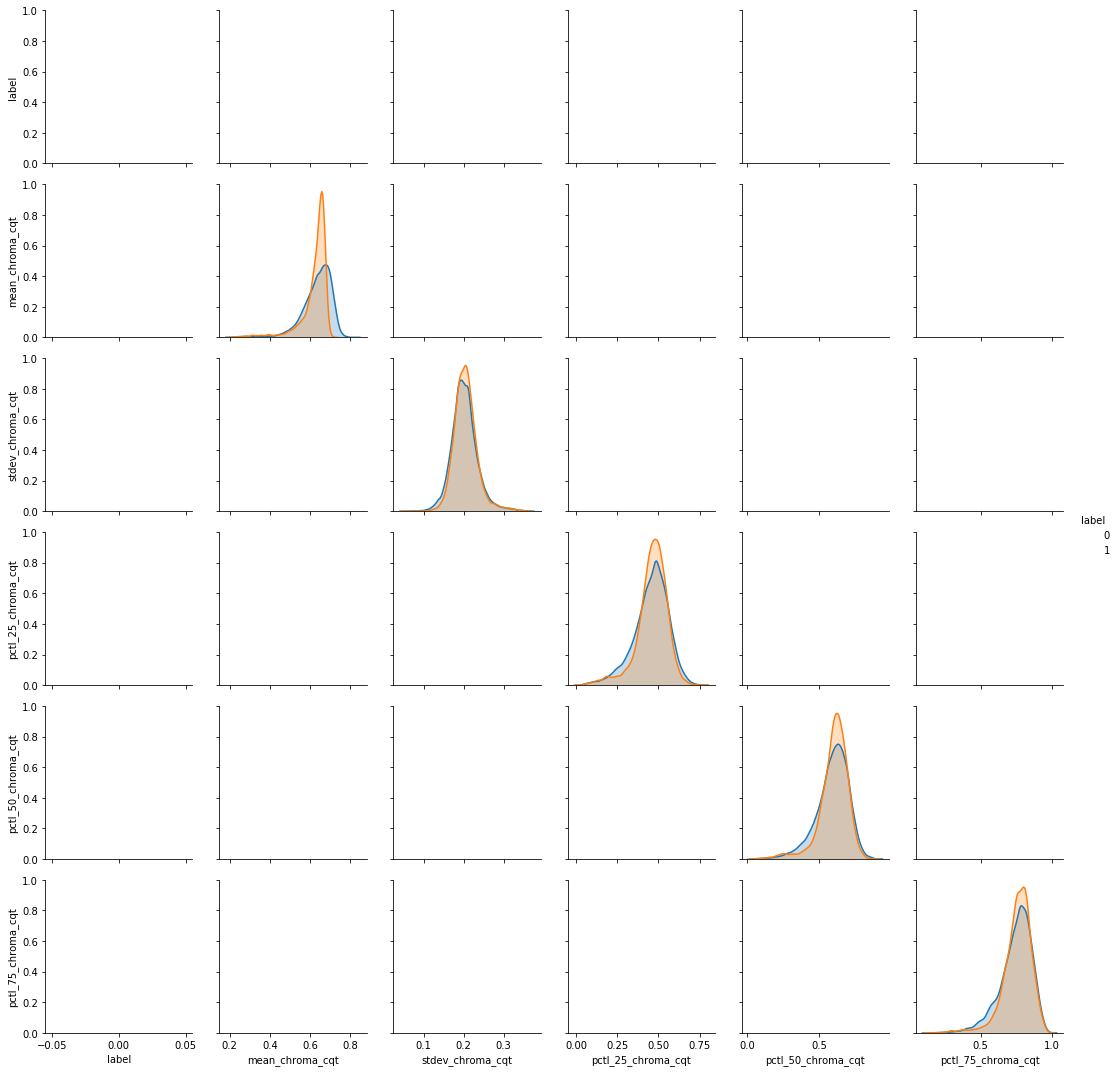

In [37]:
sns.pairplot(data=df[chroma_cqt],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


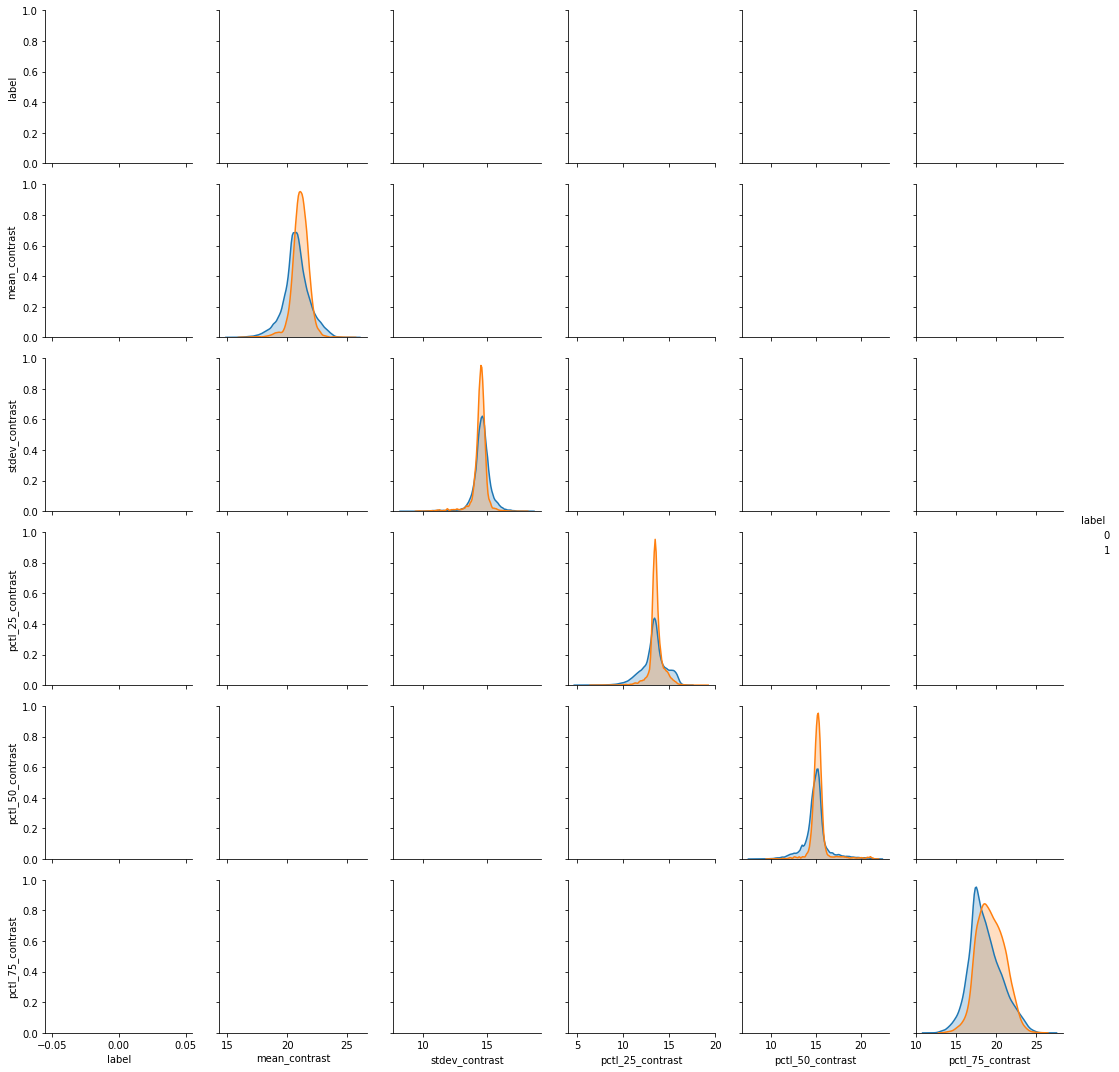

In [38]:
sns.pairplot(data=df[contrast],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


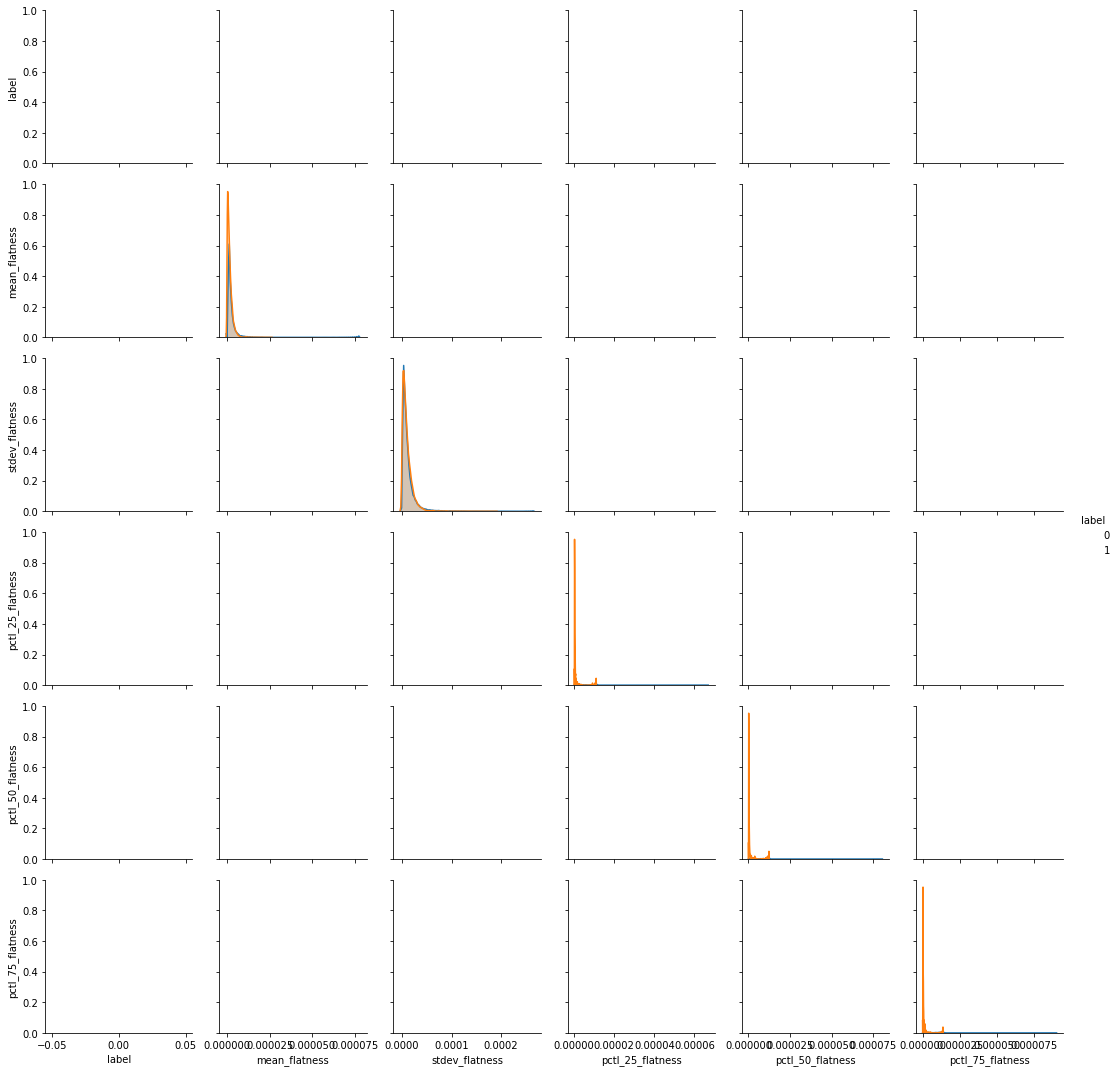

In [39]:
sns.pairplot(data=df[flatness],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


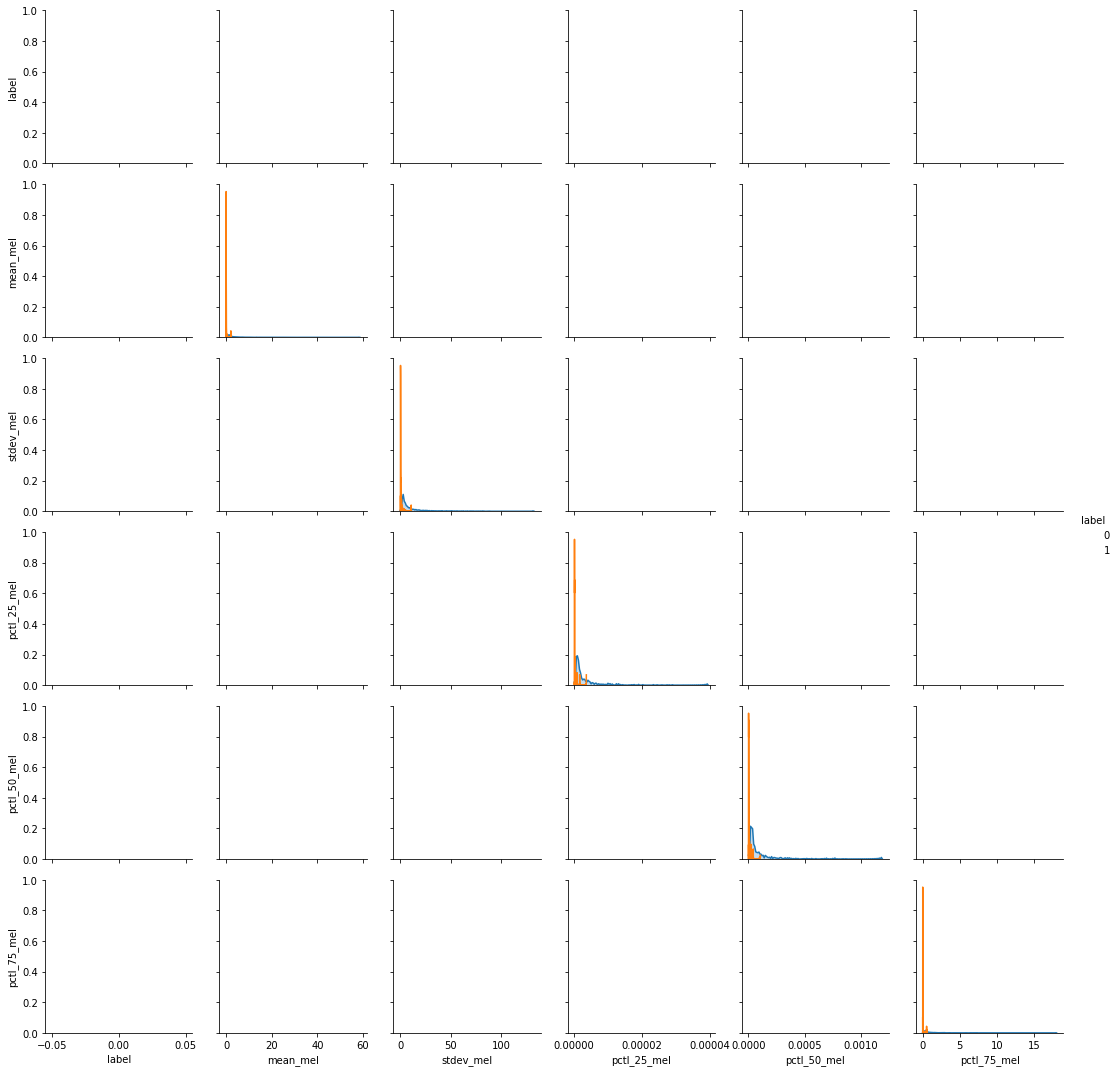

In [40]:
sns.pairplot(data=df[mel],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


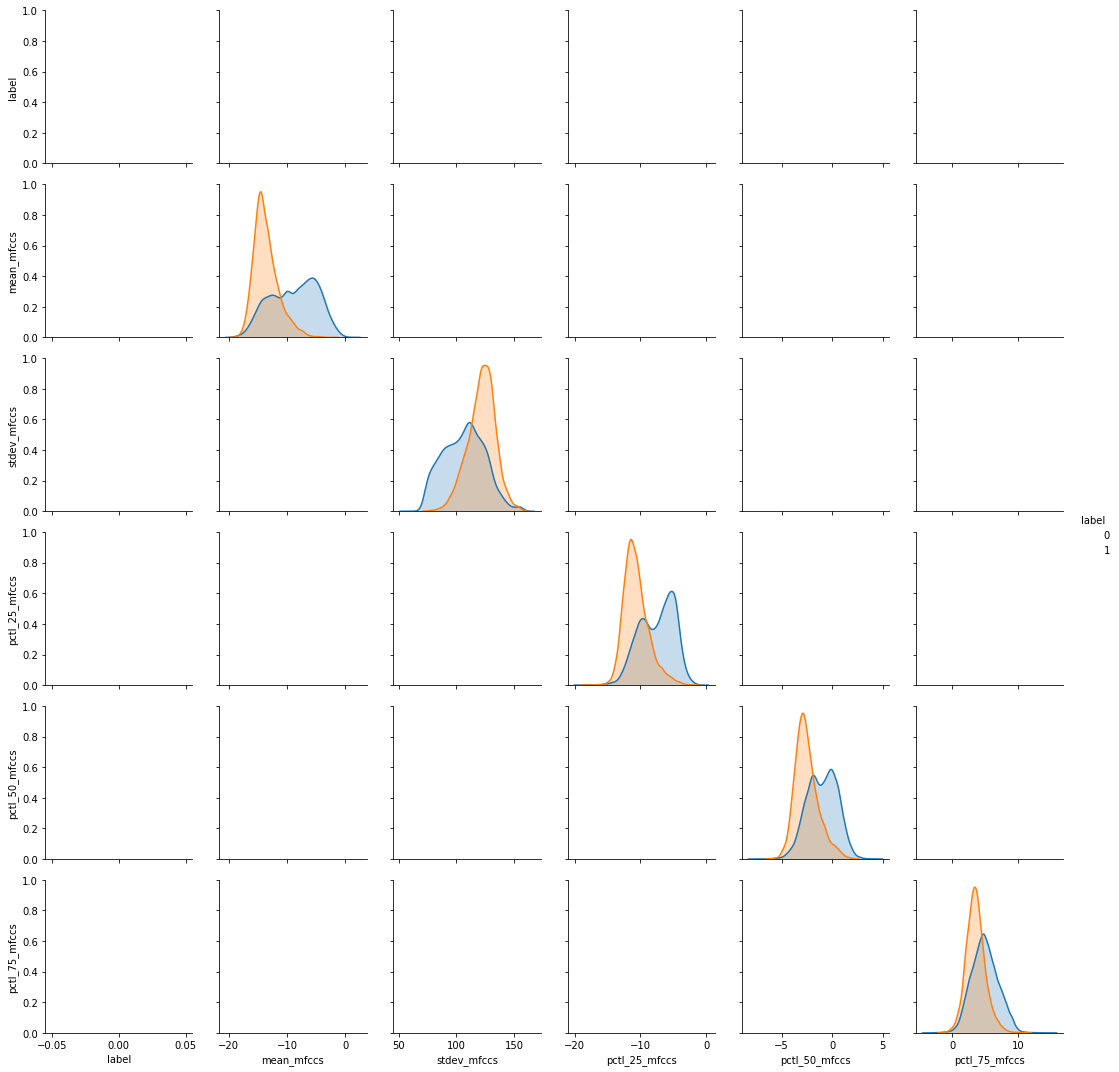

In [41]:
sns.pairplot(data=df[mfccs],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


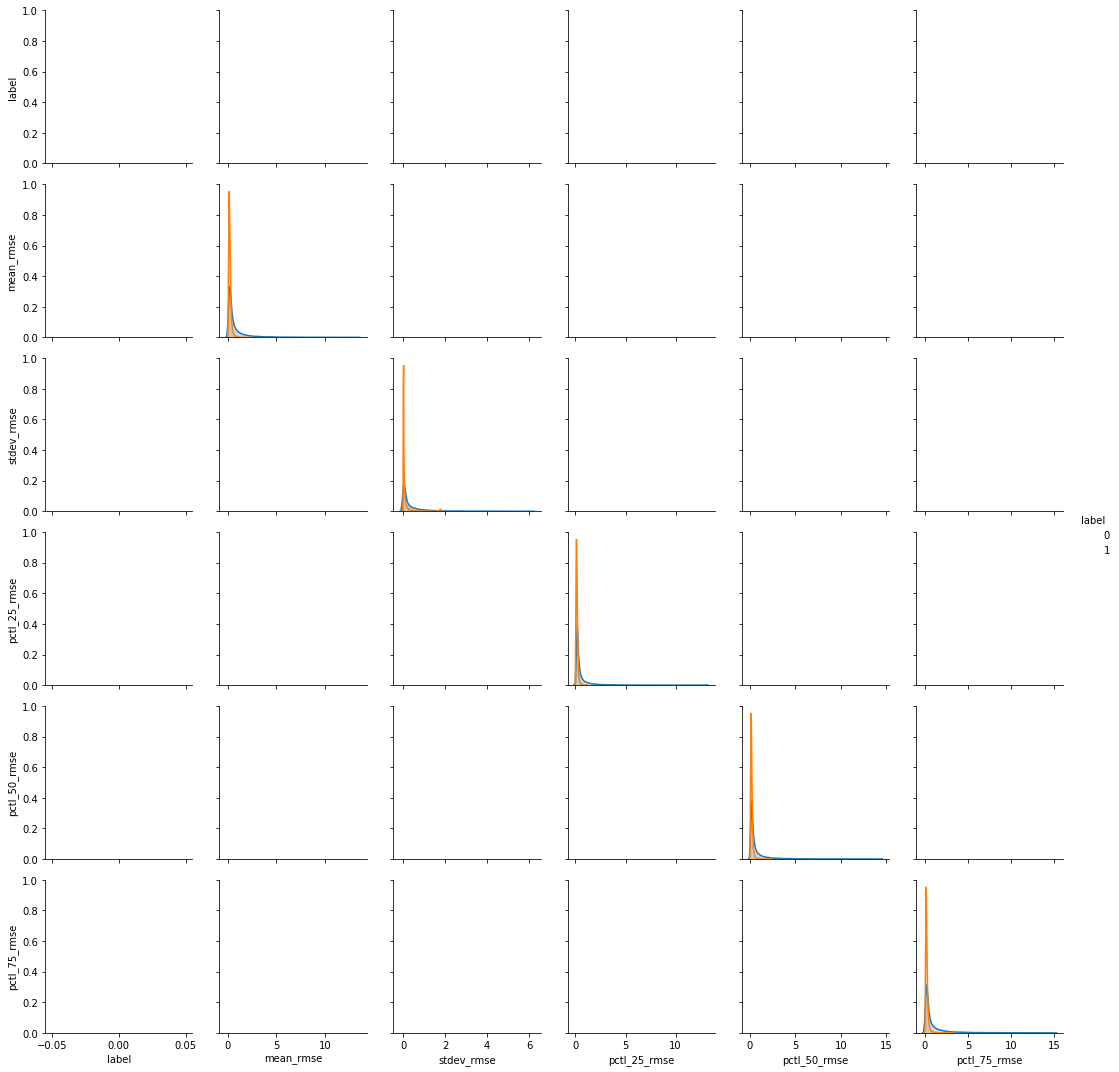

In [42]:
sns.pairplot(data=df[rmse],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


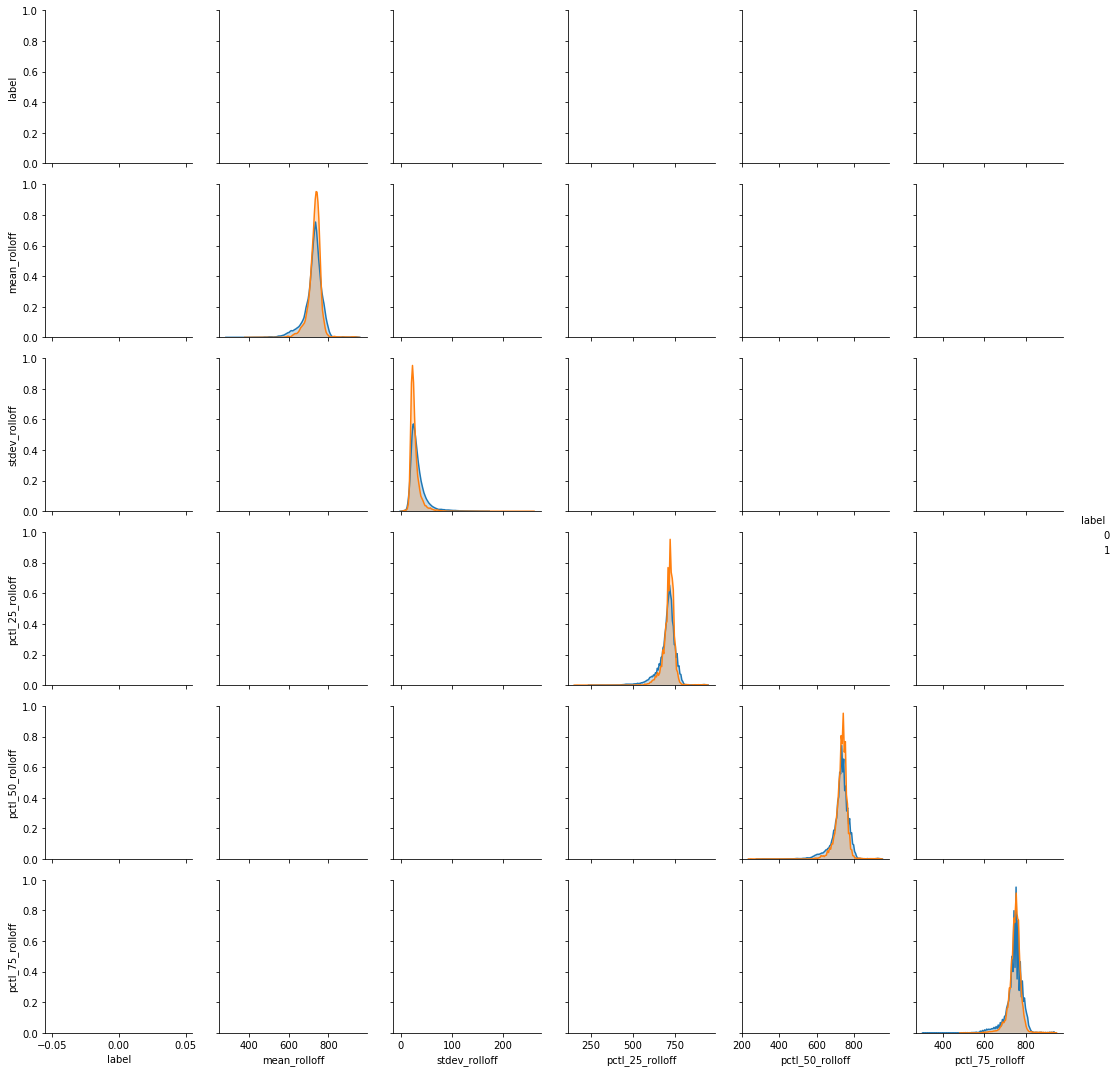

In [43]:
sns.pairplot(data=df[rolloff],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


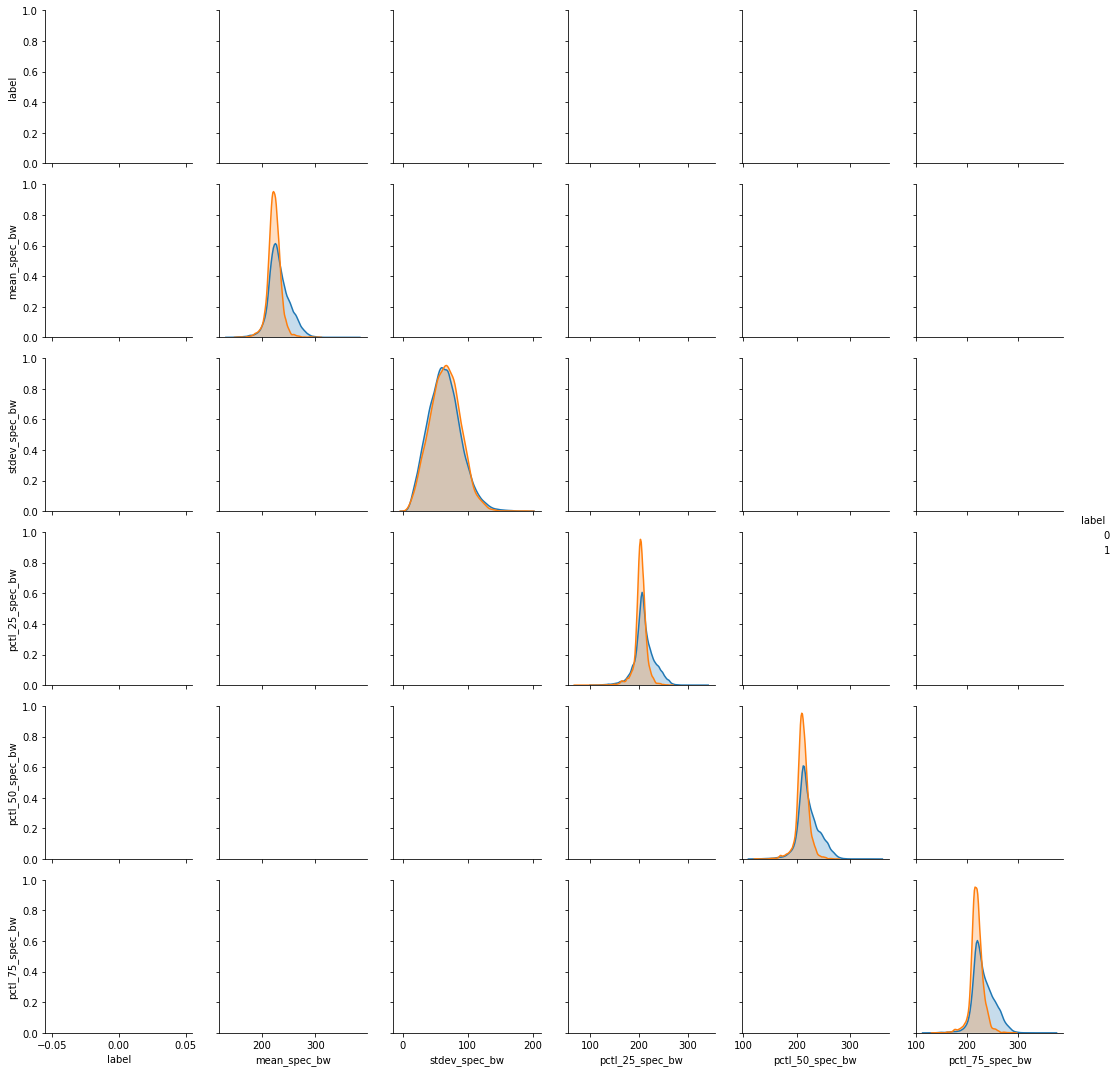

In [44]:
sns.pairplot(data=df[spec_bw],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


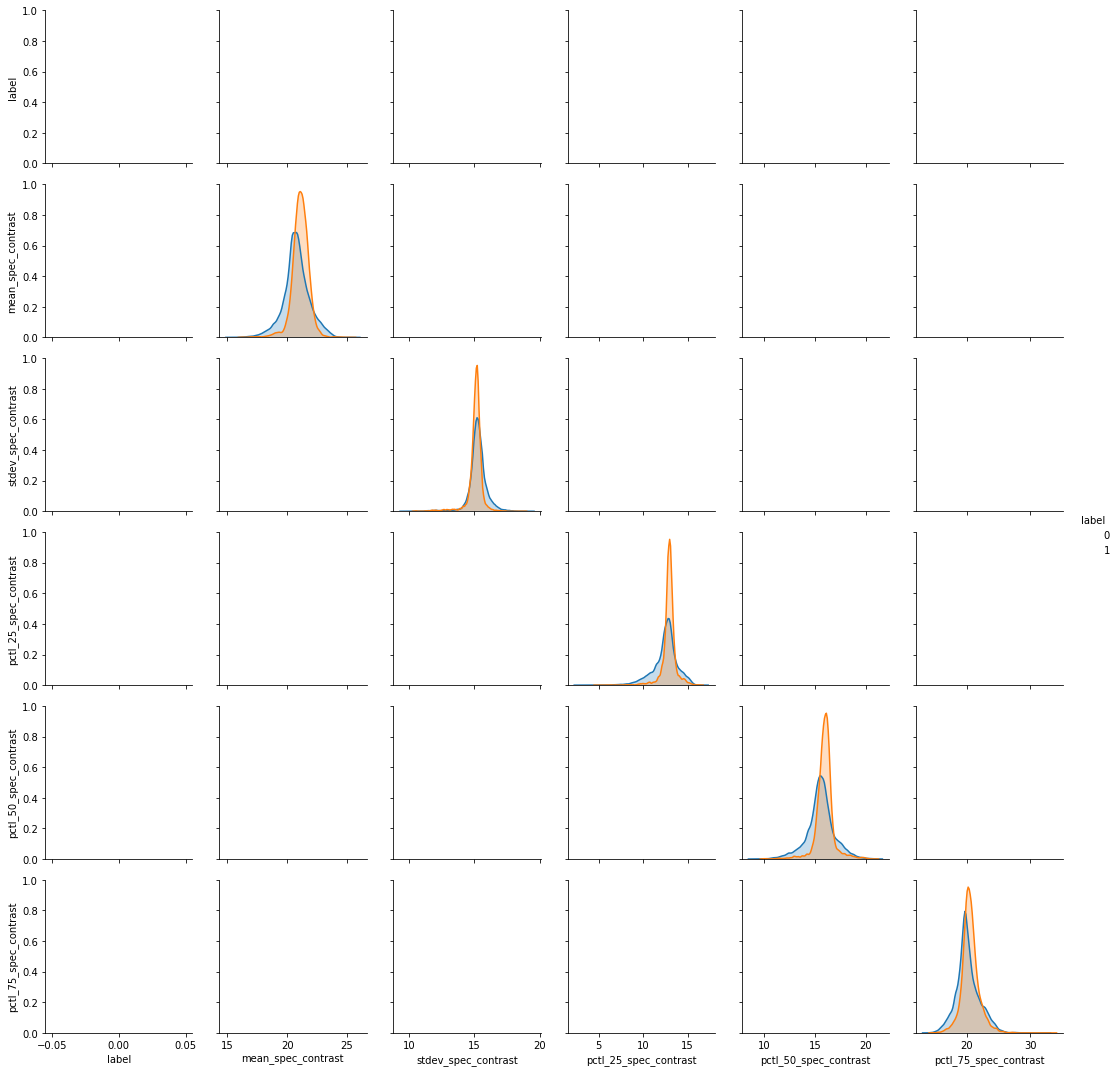

In [45]:
sns.pairplot(data=df[spec_contrast],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


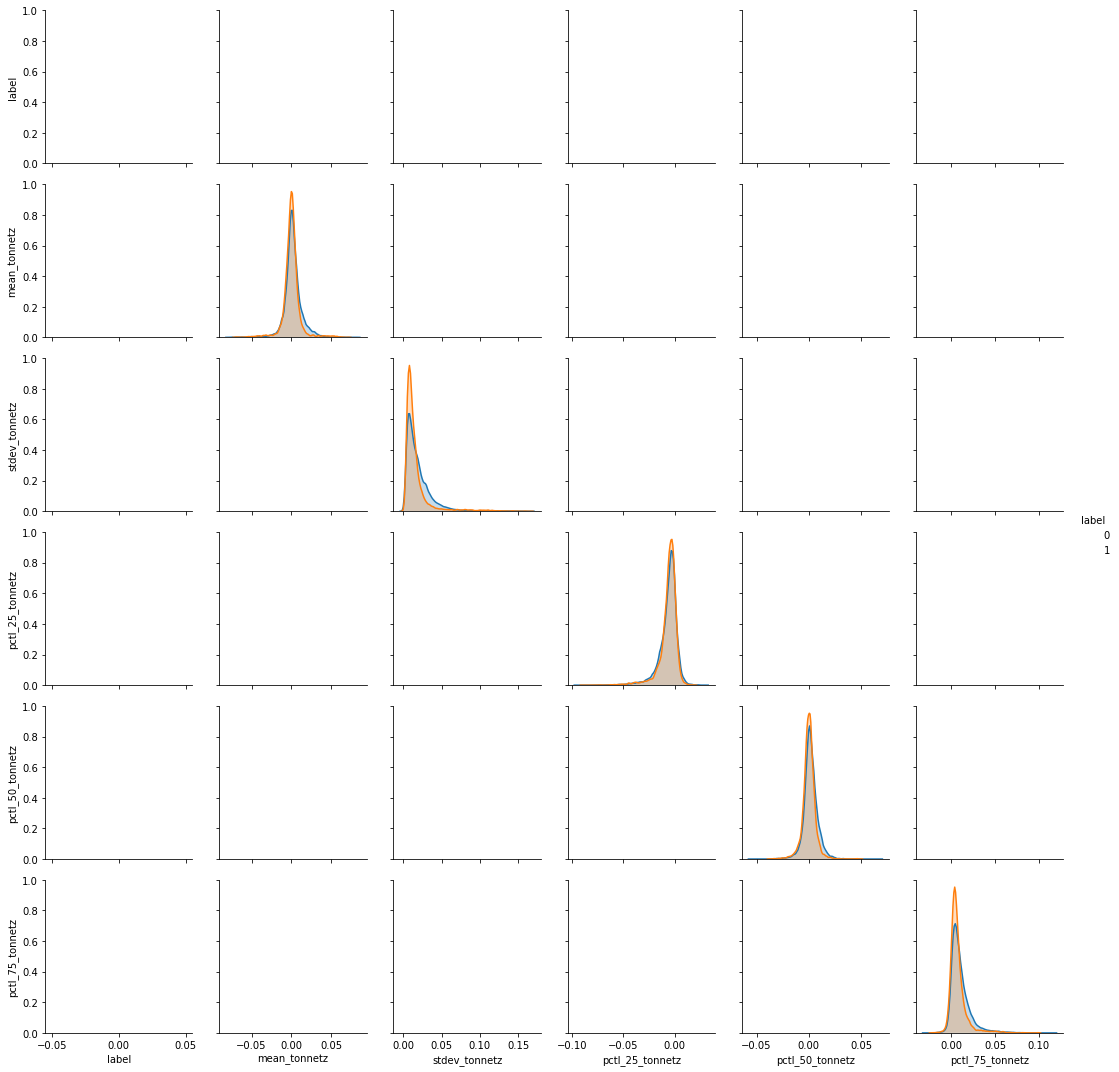

In [46]:
sns.pairplot(data=df[tonnetz],kind='dist',hue='label')

/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kmussar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kmussar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


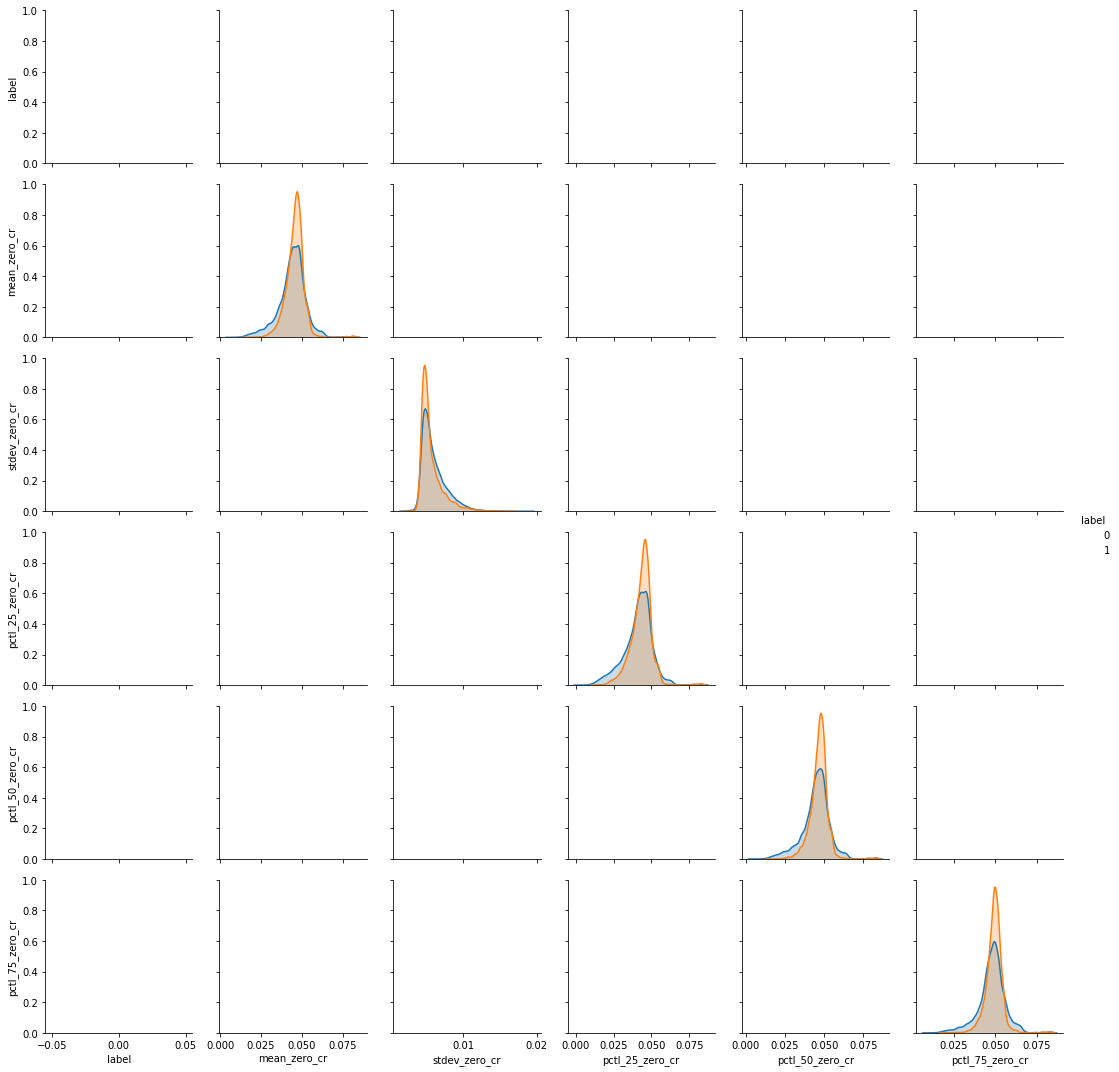

In [47]:
sns.pairplot(data=df[zero_cr],kind='dist',hue='label')

### Feature Importance:
* centroid - ok, all equal
* chroma - ok, mean strongest
* chroma_cens - ok, mean strongest
* chroma_cqt - not great. mean is okay 
* contrast - good, p25 strongest
* flatness - can't see
* mel - can't see
* mfcc - good, mean- strongest
* rmse - can't see
* rolloff - not great - stdev strongest
* spec_bw - ok - mean, 25 strongest, stdev - no diff
* spec_cont - ok, p25 best
* tonnetz - not great - stdev strongest
* zero cr - ok, mean, p25 strongest

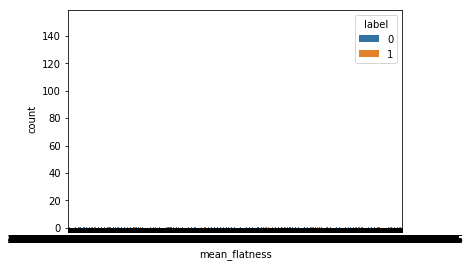

In [52]:
sns.countplot(x='mean_flatness',data=df,hue='label')